
# Project 1

### * Exploratory Analysis on the dataset admissions.csv*

* ##### *Loading necessary Python libraries for the analysis*

In [57]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

* ##### *Accessing and reading dataset admissions.csv*

In [34]:
#Reading data from the stored location 
adm_df = pd.read_csv("assets/admissions.csv")
print adm_df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


* ##### *Creating a data dictionary for the above dataset*

Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = Rejected 1 = Accepted | categorical
Gre | GRE Score | continuous
GPA | Grade Point Average | continuous
Prestige | rank of an applicant's undergraduate alma mater, <br /> with 1 being the highest and 4 as the lowest | categorical


 #### *Exploring the dataset*
* ###### *Number of observations in the dataset*

In [35]:
adm_df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

1) There are 400 observations in the dataset! <br/>
2) There are two missing values in the variables "gre" and "gpa" <br/>
3) The is one missing value in the variable "prestige"

* ###### *Dataset statistics*

In [36]:
print adm_df.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [37]:
adm_df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

The statistics of gre are relatively large due to the range of the variable compared to others

* ###### *Removing Null values to explore the data for different features distribution*

In [38]:
adm_df = adm_df.dropna() 
print adm_df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


* ###### *Observing Correlation between feature variables*

In [145]:
# create a correlation matrix
adm_df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


There is little or no correlation between the variables. The most coorelated variables are GPA and GRE - which indicates that higher the GPA of the student then there is a chance that their GRE score is also high. 

* ###### *Exploring via charts - Creating Box plots for GRE and GPA*

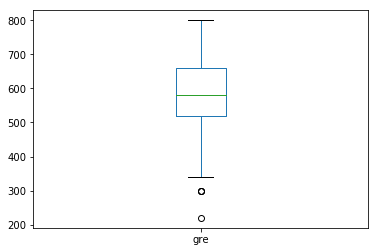

In [39]:
#gre boxplot
adm_df['gre'].plot(kind='box')

There are two outliers in GRE with values around 300 and 225

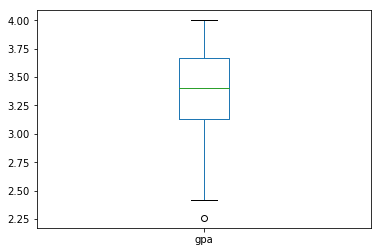

In [40]:
#gpa boxplot
adm_df['gpa'].plot(kind='box')

There is one outlier in gpa with value of about 2.25

* ###### *Observing distributions of the feature variables*

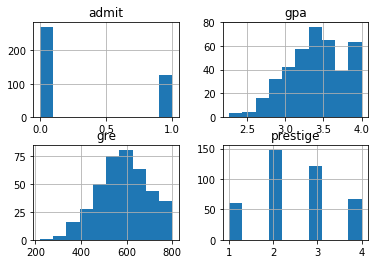

In [41]:
# plot the distribution of the feature variables 
adm_df.hist()
pl.show()

GPA and GRE have slightly right skewed distributions

* ###### *observing %admits for different ranks of alma matter *

In [133]:
df1 = pd.crosstab(adm_df.admit,adm_df.prestige)

In [134]:
df1 = df1.apply(lambda x: x/x.sum(),axis=0)

In [135]:
df1 = pd.DataFrame(df1.unstack()).reset_index()

In [136]:
df1.columns = ["prestige","admit","studs"]

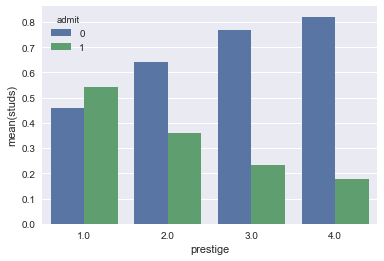

In [144]:
sn.barplot( df1.prestige, df1.studs, hue = df1.admit )

###### Hypothesis: Higher the rank of alma matter higher is the percentage of admits

### Next steps: 
1) Using the outcome variable "admit" and predictors as "prestige", "gre" and "gpa" (since there is no correlation between the variables) perform an analysis such as regression to see how each of these variables can help predict the outcome

2) Explore how outliers outliers affect the analysis 